### Data Processing

In [64]:
import numpy as np
from sklearn import preprocessing
import os
from matplotlib import pyplot as plt
from scipy.io import loadmat
import glob
import pandas as pd

In [65]:
os.chdir("/home/st122388/work/dsai project")

### Preprocessed Data

In [66]:
annots = loadmat('seed/Preprocessed_EEG/1_20131027.mat')
annots.keys()


dict_keys(['__header__', '__version__', '__globals__', 'djc_eeg1', 'djc_eeg2', 'djc_eeg3', 'djc_eeg4', 'djc_eeg5', 'djc_eeg6', 'djc_eeg7', 'djc_eeg8', 'djc_eeg9', 'djc_eeg10', 'djc_eeg11', 'djc_eeg12', 'djc_eeg13', 'djc_eeg14', 'djc_eeg15'])

In [67]:
type(annots['djc_eeg1']),annots['djc_eeg1'].shape #type and shape of eeg data

(numpy.ndarray, (62, 47001))

### EEG1 plot which is already downsampled and in frequency domain

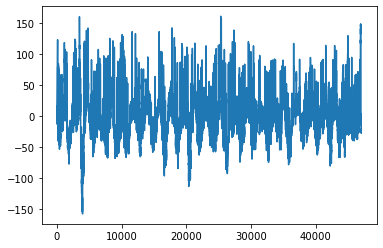

In [68]:
plt.plot(annots['djc_eeg1'][1,:])
plt.show()

### Since in the paper we need differential entrophy features and the datasets SEED which was provided has preprocessd datsets and features extracted datasets. We used Features Extracted Datasets for this work

In [74]:
os.chdir('/home/st122388/work/dsai project/seed/ExtractedFeatures')

# Get a list for .mat files in current folder
mat_files = glob.glob('*.mat')
label =loadmat('label.mat')
mat_files.remove('label.mat')
mat_files_1 = [x for x in mat_files if len(x.split("_")) == 2] 
mat_files_1.sort(key = lambda x : int(x.split("_")[0]))

# List for stroring all the data
alldata = []
# Iterate mat files
for fname in mat_files_1:
    # Load mat file data into data.
    data = loadmat(fname)
    
    # Append data to the list
    alldata.append(data)
    

In [75]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'de_movingAve1', 'de_LDS1', 'psd_movingAve1', 'psd_LDS1', 'dasm_movingAve1', 'dasm_LDS1', 'rasm_movingAve1', 'rasm_LDS1', 'asm_movingAve1', 'asm_LDS1', 'dcau_movingAve1', 'dcau_LDS1', 'de_movingAve2', 'de_LDS2', 'psd_movingAve2', 'psd_LDS2', 'dasm_movingAve2', 'dasm_LDS2', 'rasm_movingAve2', 'rasm_LDS2', 'asm_movingAve2', 'asm_LDS2', 'dcau_movingAve2', 'dcau_LDS2', 'de_movingAve3', 'de_LDS3', 'psd_movingAve3', 'psd_LDS3', 'dasm_movingAve3', 'dasm_LDS3', 'rasm_movingAve3', 'rasm_LDS3', 'asm_movingAve3', 'asm_LDS3', 'dcau_movingAve3', 'dcau_LDS3', 'de_movingAve4', 'de_LDS4', 'psd_movingAve4', 'psd_LDS4', 'dasm_movingAve4', 'dasm_LDS4', 'rasm_movingAve4', 'rasm_LDS4', 'asm_movingAve4', 'asm_LDS4', 'dcau_movingAve4', 'dcau_LDS4', 'de_movingAve5', 'de_LDS5', 'psd_movingAve5', 'psd_LDS5', 'dasm_movingAve5', 'dasm_LDS5', 'rasm_movingAve5', 'rasm_LDS5', 'asm_movingAve5', 'asm_LDS5', 'dcau_movingAve5', 'dcau_LDS5', 'de_movingAve6', 'de_LDS6

In [81]:
data['de_LDS1'].shape

(62, 235, 5)

In [82]:
os.chdir('/home/st122388/work/dsai project')
columns = pd.read_excel('seed/channel-order.xlsx',header=None)
df_list = columns.T.values.tolist()

In [85]:
data_1_1 = loadmat("seed/ExtractedFeatures/1_20131027.mat")

In [86]:
label_data =loadmat("seed/ExtractedFeatures/label.mat")
label = label_data['label']
label = label.reshape(15,)
label += 1


In [87]:
def window_slice(data, time_steps):
    data_ = data.copy()
    data_ = np.transpose(data_, (1, 0, 2)).reshape(-1, 310) # (n, 310)
    
    data_st = data_.reshape(data_.shape[0] * data_.shape[1], ) #(n*310, )
    data_st = preprocessing.scale(data_st)
    data_st += 0.5
    data_ = data_st.reshape(data_.shape[0], data_.shape[1]) #(n, 310)
    
    xs = []
    for i in range(int(data_.shape[0] / time_steps)):
        k = i*time_steps
        xs.append(data_[k: k + time_steps, :])
    
    xs = np.concatenate(xs).reshape((len(xs), -1, 310))
    return xs


In [88]:
def setData(de_, label_data, time_steps=9):
    X = []
    y = []   

    for data, label_ in zip(de_, list(label_data)):
        X.append(window_slice(data, time_steps))
        y_np = np.array([label_] * len(X[-1]))
        y.append(y_np)
    
   
    return X, y 
    

In [89]:
de_1_1 = []
for i in range(1, 16):
    de_1_1.append(data_1_1['de_LDS' + str(i)])

In [118]:
len(de_1_1)

15

In [124]:
de_1_1_1 = pd.DataFrame(np.array(de_1_1[1][:,:,4]).T,columns=df_list)
de_1_1_1

,FP1,FPZ,FP2,AF3,AF4,F7,F5,F3,F1,FZ,...,PO3,POZ,PO4,PO6,PO8,CB1,O1,OZ,O2,CB2
0,16.321799,16.349038,17.628318,15.786498,16.499615,24.999267,16.135865,15.637137,15.427287,15.011732,...,16.208599,15.567229,15.591404,34.080594,16.593486,18.181221,17.799844,16.797631,16.149875,16.274071
1,16.320485,16.348221,17.627077,15.786358,16.497482,24.996706,16.136662,15.637165,15.427073,15.010902,...,16.208999,15.567917,15.592428,34.077694,16.595417,18.181815,17.800621,16.797784,16.150886,16.275114
2,16.319542,16.347175,17.625874,15.787071,16.495080,24.994424,16.138010,15.638677,15.427371,15.010715,...,16.209414,15.568421,15.592745,34.074293,16.596280,18.182809,17.801498,16.798163,16.151321,16.276002
3,16.317654,16.345698,17.624445,15.787162,16.492249,24.991948,16.139073,15.639345,15.427457,15.010086,...,16.209238,15.568091,15.592194,34.070284,16.595174,18.182698,17.801277,16.797880,16.151141,16.275940
4,16.314805,16.343662,17.623075,15.786447,16.489451,24.989954,16.139744,15.639402,15.427397,15.008763,...,16.208440,15.567549,15.591418,34.065605,16.593156,18.182075,17.800546,16.797387,16.150713,16.275443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,16.651671,16.592449,17.973199,15.857479,16.709198,25.539646,16.035937,15.556104,15.411796,15.001453,...,16.060899,15.354053,15.307884,33.656078,16.124087,18.063419,17.663508,16.754186,15.858928,16.048917
229,16.654200,16.593917,17.975136,15.860135,16.712268,25.539091,16.038060,15.557927,15.412726,15.003112,...,16.063209,15.356620,15.310035,33.659411,16.126720,18.066603,17.666368,16.757452,15.861440,16.051965
230,16.655977,16.595278,17.976392,15.861788,16.714565,25.539162,16.039261,15.558963,15.412959,15.004138,...,16.065705,15.358822,15.312347,33.661959,16.129459,18.069466,17.669147,16.760438,15.864085,16.054410
231,16.657250,16.596418,17.976415,15.863153,16.715678,25.538854,16.040203,15.560164,15.412679,15.004557,...,16.067600,15.360841,15.314449,33.663454,16.132100,18.071700,17.671373,16.762481,15.866571,16.056757


We used 31 right hemispheric electrodes and 31 left hemispheric elctrodes for input according to the paper

In [125]:
de_1_1_1_left = de_1_1_1.loc[:,['FP1', 'AF3', 'F7', 'F5', 'F3',
'F1','FT7', 'FC5', 'FC3', 'FC1', 'T7', 'C5', 'C3', 'C1', 'TP7', 'CP5', 'CP3',
'CP1', 'P7', 'P5', 'P3', 'P1', 'PO7', 'PO5', 'PO3', 'CB1', 'O1', 'FPZ', 'FCZ',
'CPZ', 'POZ']]

In [126]:
de_1_1_1_right = de_1_1_1.loc[:,['FP2', 'AF4', 'F8',
'F6', 'F4', 'F2', 'FT8', 'FC6', 'FC4', 'FC2', 'T8', 'C6', 'C4', 'C2', 'TP8', 'CP6',
'CP4', 'CP2', 'P8', 'P6', 'P4', 'P2', 'PO8', 'PO6', 'PO4', 'CB2', 'O2', 'FZ', 'CZ',
'PZ', 'OZ']]

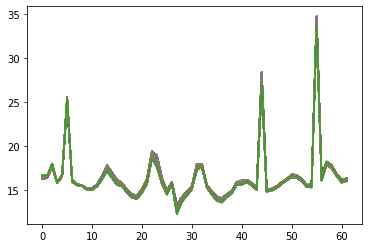

In [127]:
plt.plot(de_1_1[1][:,:,4])
plt.show()

In [90]:
x1, y1 = setData(de_1_1, label)

In [91]:
EEG_data = []
label_all = []
EEG_data.append(x1)
label_all.append(y1)

In [92]:
label_all

[[array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2], dtype=int16),
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1], dtype=int16),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        dtype=int16),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0], dtype=int16),
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        dtype=int16),
  array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        dtype=int16),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0], dtype=int16),
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1], dtype=int16),
  array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2], dtype=int16),
  array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

### Feature Extraction 

In [130]:
from torch import nn
import torch


In [131]:
class FeatureExtractor(nn.Module):
    def __init__(self, lstm_input_dim, lstm_hidden_dim, time_steps, K):
        super(FeatureExtractor, self).__init__()

        self.lstm = nn.LSTM(input_size = lstm_input_dim, 
                           hidden_size = lstm_hidden_dim,
                           batch_first = True
                           )

        self.dropout = nn.Dropout(p = 0.4) 
        
        self.sigmoid = nn.Sigmoid()
        
        self.capsule = nn.Linear(time_steps, K)

    def forward(self, X_input, hidden0 = None):

        lstm_out, _ = self.lstm(X_input) #X_input.shape = (batch_size, time_steps, lstm_hidden_dim)
       
        out = torch.transpose(lstm_out, 1, 2) #out.shape = (batch_size, lstm_hidden_dim, time_steps)
        
        H = self.capsule(out) #H.shape = (batch_size, lstm_hidden, K = 3)
                
        H = H.view(H.shape[0], -1) #H.shape = (batch_size, K * lstm_hidden)
        
        H = self.sigmoid(H)

        H = self.dropout(H)
    
        return H

In [132]:
class Classifier(nn.Module):
    def __init__(self, lstm_hidden_dim, K, class_num):
        super(Classifier, self).__init__()

        self.dense = nn.Linear(K * lstm_hidden_dim, class_num)

        self.dropout = nn.Dropout(p = 0.3)

    def forward(self, feature_output):

        output = self.dense(feature_output)

        output = self.dropout(output)

        return output

### Gradient Reverse layer

In [140]:
class ReverseLayer():
    def forward(self, input, alpha):
        self.alpha = alpha

   
    def backward(self, grad_output): 
        pass
        

In [141]:
epochs_num = 50
batch_size = 256
lstm_input_dim = 310
lstm_hidden_dim = 150
time_steps = 9
K = 3
class_num = 3
SGD_lr = 0.01
momentum = 0.9
weight_decay = 0.01


In [134]:
model_F = FeatureExtractor(lstm_input_dim, lstm_hidden_dim, time_steps, K)
model_C = Classifier(lstm_hidden_dim, K, class_num)

In [135]:
model_F

FeatureExtractor(
  (lstm): LSTM(310, 150, batch_first=True)
  (dropout): Dropout(p=0.4, inplace=False)
  (sigmoid): Sigmoid()
  (capsule): Linear(in_features=9, out_features=3, bias=True)
)

In [136]:
model_C

Classifier(
  (dense): Linear(in_features=450, out_features=3, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)